# Amazon Sales Dataset Recommendation System using Collaborative Filtering and Autoencoders

**Group members:**
- Tasneem Shaheen, 107279
- Mostafa Khalid 106699
- Medhansh Ahuja 105982

The aim for this project is to Build a recommender system to predict user ratings and recommend top products using two approaches: Collaborative Filtering (CF) and Autoencoders.

## Data Processing
### Load scraped data

In [165]:
# For all the imports we have
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
df = pd.read_csv('amazon.csv')

In [167]:
# Display basic info
print(f"Dataset shape: {df.shape}")
print(f"Number of unique products id: {df['product_id'].nunique()}") #

Dataset shape: (1465, 16)
Number of unique products id: 1351


In [168]:
# Display the first few rows
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [169]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [170]:
# Get summary statistics for numerical columns
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


/tmp/ipykernel_32819/2070778007.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_count', y='product_name', data=top_products, palette="magma")
/tmp/ipykernel_32819/2070778007.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


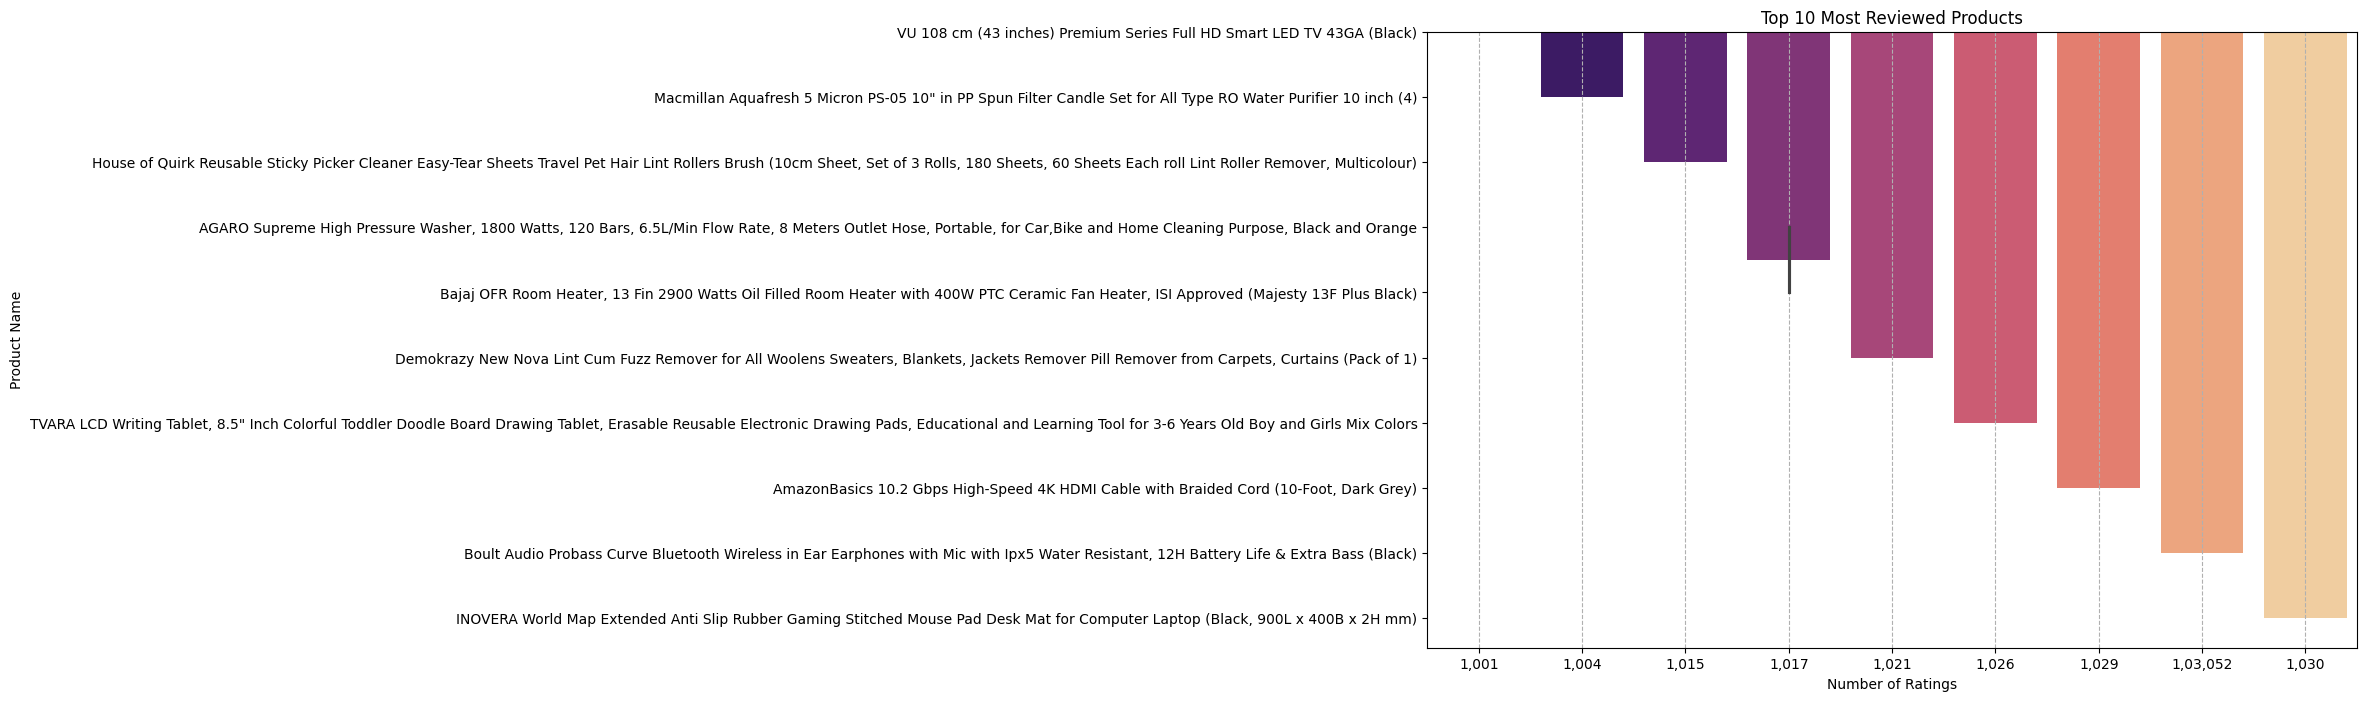

In [171]:
# Top 10 products by rating count


top_products = df.sort_values(by='rating_count', ascending=True).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='rating_count', y='product_name', data=top_products, palette="magma")
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Number of Ratings")
plt.ylabel("Product Name")
plt.grid(axis="x", linestyle="--")
plt.tight_layout()
plt.show()

In [172]:
# Check for missing values in specified columns
print("\nChecking for missing values in user_id, product_id, and rating columns:")
for col in ['user_id', 'product_id', 'rating']:
    missing_values = df[col].isnull().sum()
    print(f"Missing values in {col}: {missing_values}")


Checking for missing values in user_id, product_id, and rating columns:
Missing values in user_id: 0
Missing values in product_id: 0
Missing values in rating: 0


In [173]:
# Check for duplicate rows
print("\nChecking for duplicate rows:")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Checking for duplicate rows:
Number of duplicate rows: 0


## Data Preprocessing

In [174]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [175]:
products = df[['product_id', 'product_name']].drop_duplicates().set_index('product_id')
data = df[['user_id', 'product_id', 'rating']]

data.head()

,user_id,product_id,rating
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,4.2
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,4.0
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,3.9
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",B08HDJ86NZ,4.2
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",B08CF3B7N1,4.2


### Data Transformation


In [176]:
#Convert Text IDs to Numeric IDs
user_enc = LabelEncoder()
item_enc = LabelEncoder()

data.loc[:, 'user_id'] = user_enc.fit_transform(data['user_id'])
data.loc[:, 'product_id'] = item_enc.fit_transform(data['product_id'])

data.head()

,user_id,product_id,rating
0,623,346,4.2
1,88,848,4.0
2,849,819,3.9
3,254,643,4.2
4,17,588,4.2


In [177]:
pivot_table = data.pivot_table(index='user_id', columns='product_id', values='rating')
# Fill missing values in the pivot table with 0
pivot_table = pivot_table.fillna(0)
pivot_table.head()

product_id,0,1,2,3,4,5,6,7,8,9,...,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# First Approach: Collaborative Filtering


In [178]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from collections import defaultdict


rating_min = data['rating'].min()
rating_max = data['rating'].max()

print(f"Rating scale: [{rating_min}, {rating_max}]")
print(f"Number of ratings: {len(data):,}")
print(f"Number of users: {data['user_id'].nunique():,}")
print(f"Number of products: {data['product_id'].nunique():,}")
# Calculate sparsity - handle potential division by zero if users or items are 0
num_users = data['user_id'].nunique()
num_items = data['product_id'].nunique()
if num_users > 0 and num_items > 0:
    sparsity = (1 - len(data) / (num_users * num_items)) * 100
    print(f"Sparsity: {sparsity:.2f}%")

Rating scale: [2.0, 5.0]
Number of ratings: 1,465
Number of users: 1,194
Number of products: 1,351
Sparsity: 99.91%


In [179]:
# Split data into training and testing sets
# right at the top, before you build your Surprise dataset:
df = data.copy()

df = data.dropna(subset=['user_id', 'product_id', 'rating'])
reader = Reader(rating_scale=(df['rating'].min(), data['rating'].max()))
dataset = Dataset.load_from_df(df[['user_id', 'product_id', 'rating']], reader)

trainset, testset = train_test_split(dataset, test_size=0.2, random_state=42)

# --- Train a single model (SVD) ---
print("\nTraining SVD model...")
model = SVD(n_factors=50, n_epochs=20, random_state=42)
#model = SVD(n_factors=50, random_state=42)
model.fit(trainset)
print("SVD model training complete.")

# --- Evaluate the model ---
print("\nEvaluating model performance...")
predictions = model.test(testset)

# Calculate RMSE
rmse_svd = accuracy.rmse(predictions)



Training SVD model...
SVD model training complete.

Evaluating model performance...
RMSE: 0.2593


# Encoded recomendations

In [180]:
def get_top_n_recommendations(algo, data, user_id, n=5):
    # Get all unique items
    all_items = data['product_id'].unique()

    # Get items the user has already rated
    rated_items = data[data['user_id'] == user_id]['product_id']

    # Predict ratings for unrated items
    predictions = []
    for item in all_items:
        if item not in rated_items.values:
            pred = algo.predict(user_id, item)
            predictions.append((item, pred.est))

    # Sort by predicted rating
    predictions.sort(key=lambda x: x[1], reverse=True)

    return predictions[:n]

# Named Recomendation

In [181]:
def get_named_recommendations(algo, data, user_id, n=5):
    # all numeric product_ids
    all_items = data['product_id'].unique()
    # items the user already rated
    seen = set(data.loc[data['user_id']==user_id, 'product_id'])

    preds = []
    for iid in all_items:
        if iid not in seen:
            est = algo.predict(user_id, iid).est
            preds.append((iid, est))
    preds.sort(key=lambda x: x[1], reverse=True)
    top_n = preds[:n]

    # 3. Inverse‐transform numeric IDs → original product_id
    orig_ids = item_enc.inverse_transform([iid for iid, _ in top_n])
    scores   = [score for _, score in top_n]

    # 4. Look up product names
    results = []
    for pid, score in zip(orig_ids, scores):
        name = products.loc[pid, 'product_name']
        results.append((pid, name, score))
    return results

In [182]:
USER = 1

#top_n_recommendations = get_top_n_recommendations(model, data, user_id=USER, n=5)
#print(f"Top 5 recommendations for user 123: {top_n_recommendations}")
recommendations = get_named_recommendations(model, data, user_id=USER, n=5)
for pid, name, score in recommendations:
    print(f"{pid} — {name}: {score:.3f}")

B0BBW521YC — LAPSTER 12pcs Spiral Cable Protectors for Charger, Wires, Data Charger Cable Protector for Computers, Cell Phones etc.(Grey): 4.397
B08TGG316Z — 10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox: 4.375
B01D5H90L4 — AmazonBasics - High-Speed Male to Female HDMI Extension Cable - 6 Feet: 4.353
B084N133Y7 — Belkin Apple Certified Lightning To Type C Cable, Fast Charging For Iphone, Ipad, Air Pods, 3.3 Feet (1 Meters)    White: 4.337
B09W5XR9RT — Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black: 4.335


In [183]:
def precision_recall_at_k(predictions, k=100, threshold=3.5):
    """Return precision and recall at k metrics for each user."""

    user_prediction = defaultdict(list)
    for uid, _, true_rating, estimated, _ in predictions:
        user_prediction[uid].append((estimated, true_rating))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_prediction.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        # Number of relevant items
        n_relevant = sum((true_rating >= threshold) for (_, true_rating) in user_ratings)
        # Number of recommended items in top k
        n_rec_k = sum((estimated >= threshold) for (estimated, _) in user_ratings[:k])
        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_rating >= threshold) and (estimated >= threshold))
                              for (estimated, true_rating) in user_ratings[:k])
        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_relevant if n_relevant != 0 else 1
    return precisions, recalls

In [184]:
print("\nCalculating Precision@k and Recall@k...")
# Set your desired k and rating threshold for 'relevant' items
K = 2
RATING_THRESHOLD = 3.5 # Assuming a rating of 3.5 or higher is considered 'relevant'

precisions, recalls = precision_recall_at_k(predictions, k=K, threshold=RATING_THRESHOLD)

# Average precision and recall
avg_precision = sum(prec for prec in precisions.values()) / len(precisions)
avg_recall = sum(rec for rec in recalls.values()) / len(recalls)

print(f"Precision@{K}: {avg_precision:.4f}")
print(f"Recall@{K}: {avg_recall:.4f}")


Calculating Precision@k and Recall@k...
Precision@2: 0.9856
Recall@2: 0.9988


#2nd approach: 
##KNN Model

In [185]:
# %% [markdown]
# ## kNN Collaborative Filtering

# %%
from surprise import KNNBasic, accuracy
from collections import defaultdict

# 1) Split data into training and testing sets (same reader/dataset as before)
trainset_knn, testset_knn = train_test_split(dataset, test_size=0.2, random_state=42)

# 2) Retrain your best_knn on this trainset
best_knn.fit(trainset_knn)

# 3) Evaluate on the held-out testset
predictions_knn = best_knn.test(testset_knn)
rmse_knn = accuracy.rmse(predictions_knn)
print(f"kNN RMSE: {rmse_knn:.4f}")

# %%
# 4) Recommendation functions for kNN

def get_top_n_recommendations_knn(algo, df, user_id, n=5):
    all_items   = df['product_id'].unique()
    rated_items = set(df.loc[df['user_id']==user_id, 'product_id'])
    preds = []
    for iid in all_items:
        if iid not in rated_items:
            est = algo.predict(user_id, iid).est
            preds.append((iid, est))
    preds.sort(key=lambda x: x[1], reverse=True)
    return preds[:n]

def get_named_recommendations_knn(algo, df, user_id, n=5):
    top_n = get_top_n_recommendations_knn(algo, df, user_id, n)
    # If you encoded product_id via LabelEncoder, inverse-transform; otherwise skip
    raw_iids = [iid for iid, _ in top_n]
    orig_iids = item_enc.inverse_transform(raw_iids)
    results = []
    for pid_enc, score in zip(orig_iids, [s for _, s in top_n]):
        name = products.loc[pid_enc, 'product_name']
        results.append((pid_enc, name, score))
    return results

def precision_recall_at_k_knn(predictions, k=10, threshold=3.5):
    user_ratings = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_ratings[uid].append((est, true_r))

    precisions = {}
    recalls    = {}
    for uid, ratings in user_ratings.items():
        ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel       = sum((true_r >= threshold) for _, true_r in ratings)
        n_rec_k     = sum((est    >= threshold) for est, _ in ratings[:k])
        n_rel_and_k = sum(((true_r >= threshold) and (est >= threshold))
                          for est, true_r in ratings[:k])
        precisions[uid] = n_rel_and_k / n_rec_k   if n_rec_k else 1
        recalls[uid]    = n_rel_and_k / n_rel     if n_rel   else 1
    return precisions, recalls

# %%
# 5) Top‑5 named recommendations for USER=1
USER = 1
recs_knn = get_named_recommendations_knn(best_knn, data, USER, n=5)
print("\nTop‑5 kNN Recommendations:")
for pid, name, score in recs_knn:
    print(f"{pid} — {name}: {score:.3f}")

# %%
# 6) Precision@K and Recall@K on the held‑out testset
K_KNN = 10
THRESH = 3.5
prec_knn, rec_knn = precision_recall_at_k_knn(predictions_knn, k=K_KNN, threshold=THRESH)

avg_prec_knn = sum(prec_knn.values()) / len(prec_knn)
avg_rec_knn  = sum(rec_knn.values())  / len(rec_knn)
print(f"\nkNN Precision@{K_KNN}: {avg_prec_knn:.4f}")
print(f"kNN Recall@{K_KNN}:    {avg_rec_knn:.4f}")

# %%



Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.2574
kNN RMSE: 0.2574

Top‑5 kNN Recommendations:
B07JW9H4J1 — Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey): 4.094
B098NS6PVG — Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black): 4.094
B096MSW6CT — Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices: 4.094
B08HDJ86NZ — boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red): 4.094
B08CF3B7N1 — Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync 

In [186]:
import pandas as pd
import numpy as np

from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy

# 1) Keep a copy of your raw ratings table
df = data.dropna(subset=['user_id', 'product_id', 'rating']).copy()

# 2) Build Surprise dataset from df
reader  = Reader(rating_scale=(df.rating.min(), df.rating.max()))
dataset = Dataset.load_from_df(df[['user_id','product_id','rating']], reader)

# 3) Train + evaluate your SVD as before
trainset, testset = train_test_split(dataset, test_size=0.2, random_state=42)
svd = SVD(n_factors=50, n_epochs=20, random_state=42)
svd.fit(trainset)
pred_svd = svd.test(testset)
print("SVD RMSE:", accuracy.rmse(pred_svd))

# 4) kNN cross‑validation over the same 'dataset'
best_rmse    = float('inf')
best_params  = None
best_knn     = None

for k in [10,20,40]:
    for sim_opts in [{'name':'cosine','user_based':True},
                     {'name':'pearson','user_based':True}]:
        print(f"CV k={k}, sim={sim_opts}")
        knn = KNNBasic(k=k, sim_options=sim_opts)
        cv = cross_validate(knn, dataset, measures=['rmse','mae'], cv=5, verbose=False)
        mean_rmse = np.mean(cv['test_rmse'])
        print(f" → Mean RMSE: {mean_rmse:.4f}")
        if mean_rmse < best_rmse:
            best_rmse   = mean_rmse
            best_params = {'k':k, 'sim_options':sim_opts}
            best_knn    = knn

print(f"Best kNN: RMSE={best_rmse:.4f} with {best_params}")

# 5) Retrain your best kNN on the *full* training set from the Surprise dataset
full_trainset = dataset.build_full_trainset()
best_knn.fit(full_trainset)

# 6) (Optional) Evaluate kNN on that same full_trainset
testset_knn = full_trainset.build_testset()
pred_knn    = best_knn.test(testset_knn)
print("kNN  RMSE:", accuracy.rmse(pred_knn))


RMSE: 0.2593
SVD RMSE: 0.2593341047022598
CV k=10, sim={'name': 'cosine', 'user_based': True}
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
 → Mean RMSE: 0.2811
CV k=10, sim={'name': 'pearson', 'user_based': True}
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
 → Mean RMSE: 0.2804
CV k=20, sim={'name': 'cosine', 'user_based': 

In [187]:
def get_top_n_recommendations_knn(algo, data, user_id, n=5):
    all_items = data['product_id'].unique()
    rated_items = data[data['user_id'] == user_id]['product_id']
    
    predictions = []
    for item in all_items:
        if item not in rated_items.values:
            pred = algo.predict(user_id, item)
            predictions.append((item, pred.est))
    
    predictions.sort(key=lambda x: x[1], reverse=True)
    return predictions[:n]


In [188]:
def get_named_recommendations_knn(algo, data, user_id, n=5):
    all_items = data['product_id'].unique()
    seen = set(data.loc[data['user_id'] == user_id, 'product_id'])
    
    preds = []
    for iid in all_items:
        if iid not in seen:
            est = algo.predict(user_id, iid).est
            preds.append((iid, est))
    
    preds.sort(key=lambda x: x[1], reverse=True)
    top_n = preds[:n]
    
    orig_ids = item_enc.inverse_transform([iid for iid, _ in top_n])
    scores = [score for _, score in top_n]

    results = []
    for pid, score in zip(orig_ids, scores):
        name = products.loc[pid, 'product_name']
        results.append((pid, name, score))
    
    return results


In [189]:
def precision_recall_at_k_knn(predictions, k=100, threshold=3.5):
    user_prediction = defaultdict(list)
    for uid, _, true_rating, estimated, _ in predictions:
        user_prediction[uid].append((estimated, true_rating))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_prediction.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_relevant = sum((true_rating >= threshold) for (_, true_rating) in user_ratings)
        n_rec_k = sum((estimated >= threshold) for (estimated, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_rating >= threshold) and (estimated >= threshold))
                              for (estimated, true_rating) in user_ratings[:k])
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
        recalls[uid] = n_rel_and_rec_k / n_relevant if n_relevant != 0 else 1
    return precisions, recalls


In [190]:
# Get recommendations
USER = 1
recommendations_knn = get_named_recommendations_knn(best_knn, data, user_id=USER, n=5)
for pid, name, score in recommendations_knn:
    print(f"{pid} — {name}: {score:.3f}")

# Evaluate kNN precision & recall
testset_knn = trainset.build_testset()
predictions_knn = best_knn.test(testset_knn)
precisions_knn, recalls_knn = precision_recall_at_k_knn(predictions_knn, k=2, threshold=3.5)

avg_precision_knn = sum(precisions_knn.values()) / len(precisions_knn)
avg_recall_knn = sum(recalls_knn.values()) / len(recalls_knn)

print(f"\nKNN Precision@2: {avg_precision_knn:.4f}")
print(f"KNN Recall@2: {avg_recall_knn:.4f}")


B07JW9H4J1 — Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey): 4.097
B098NS6PVG — Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black): 4.097
B096MSW6CT — Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices: 4.097
B08HDJ86NZ — boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red): 4.097
B08CF3B7N1 — Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey): 4.097

KNN Precision@2: 1.0000
KNN Recall@2: 0.9802


# Second Approach: Autoencoders

### *old version of auto encoder*

### Second Approach: Autoencoders

In [191]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Get the number of products (items) and users from the pivot table
num_items = pivot_table.shape[1]
num_users = pivot_table.shape[0]

print(f"Number of users: {num_users}")
print(f"Number of items: {num_items}")

# Define the autoencoder model
input_layer = keras.Input(shape=(num_items,), name='user_rating')

encoder = layers.Dense(256, activation='relu', name='encoder_1')(input_layer)
encoder = layers.Dense(128, activation='relu', name='encoder_2')(encoder)
encoder = layers.Dense(64, activation='relu', name='encoder_3')(encoder)

decoder = layers.Dense(128, activation='relu', name='decoder_1')(encoder)
decoder = layers.Dense(256, activation='relu', name='decoder_2')(decoder)

output_layer = layers.Dense(num_items, activation='linear', name='decoder_output')(decoder)

autoencoder = keras.Model(inputs=input_layer, outputs=output_layer, name='autoencoder')

# --- INSERT: masked MSE loss that ignores zeros ---
def masked_mse(y_true, y_pred):
    # mask = 1 where the true rating is non-zero, else 0
    mask = tf.cast(tf.not_equal(y_true, 0.0), dtype=tf.float32)
    # compute squared errors only on observed entries
    se = tf.square((y_true - y_pred) * mask)
    # sum and normalize by number of observed entries
    return tf.reduce_sum(se) / (tf.reduce_sum(mask) + 1e-8)

# Compile with masked loss instead of plain 'mse'
autoencoder.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=masked_mse,
)

print("\nAutoencoder Model Summary:")
autoencoder.summary()

print("\nTraining the Autoencoder Model...")
history = autoencoder.fit(
    pivot_table.values,
    pivot_table.values,
    epochs=50,
    batch_size=32,
    shuffle=True,
    verbose=1,
    validation_split=0.2
)

print("Autoencoder Model Training Finished.")


2025-07-16 19:05:19.266902: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-16 19:05:19.271345: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-16 19:05:19.282256: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752692719.297730   32819 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752692719.302856   32819 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752692719.315973   32819 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Number of users: 1193
Number of items: 1350

Autoencoder Model Summary:


2025-07-16 19:05:21.261353: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ user_rating (InputLayer)        │ (None, 1350)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_1 (Dense)               │ (None, 256)            │       345,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_2 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_3 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_1 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_2 (Dense)               │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_output (Dense)          │ (None, 1350)           │       346,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 775,302 (2.96 MB)

 Trainable params: 775,302 (2.96 MB)

 Non-trainable params: 0 (0.00 B)


Training the Autoencoder Model...
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 16.9029 - val_loss: 16.6555
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 14.5531 - val_loss: 20.3871
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 5.3133 - val_loss: 17.7080
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 2.8506 - val_loss: 17.2681
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 1.2523 - val_loss: 17.1867
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.7334 - val_loss: 17.3052
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.4062 - val_loss: 17.2796
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.2649 - val_loss: 17.2317
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.2469 - val_loss: 17.2370
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.2338 - val_loss: 17.2223
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.1769 - val_loss: 17.1879
Epoch 12/50
30/

# Encoded recomdenations

In [192]:
# Function to get Autoencoder-based recommendations for a given user
def get_autoencoder_recommendations(user_id, autoencoder_model, pivot_table, n=10):
    if user_id not in pivot_table.index:
        print(f"User ID '{user_id}' not found in the pivot table.")
        return pd.Series()

    # Get the user's rating vector from the pivot table
    user_ratings = pivot_table.loc[[user_id]].values
    # Predict the ratings for all items using the trained autoencoder model
    predicted_ratings = autoencoder_model.predict(user_ratings, verbose=0).flatten()
    # Create a pandas Series of predicted ratings with product_id as index
    predicted_ratings_series = pd.Series(predicted_ratings, index=pivot_table.columns)
    # Get the list of items already rated by the target user
    user_rated_items = pivot_table.loc[user_id][pivot_table.loc[user_id] > 0].index
    # Drop items already rated by the user from the recommendations
    recommendations = predicted_ratings_series.drop(user_rated_items, errors='ignore')
    # Sort recommendations by predicted rating in descending order
    recommendations = recommendations.sort_values(ascending=False)
    # Return the top N product IDs
    return recommendations.head(n)

# Named recomendation

In [193]:
def get_named_recommendations_autoencoder(user_id, 
                                          autoencoder_model, 
                                          pivot_table, 
                                          item_enc, 
                                          products, 
                                          n=5):

    if user_id not in pivot_table.index:
        raise ValueError(f"User ID {user_id} not in pivot_table")

    # 1. Get user's rating vector and predict reconstructed ratings
    user_vec = pivot_table.loc[[user_id]].values  # shape (1, num_items)
    pred_vec = autoencoder_model.predict(user_vec, verbose=0).flatten()

    # 2. Build a Series of predictions indexed by encoded product_id
    pred_series = pd.Series(pred_vec, index=pivot_table.columns)

    # 3. Exclude items the user has already rated
    seen = pivot_table.loc[user_id][pivot_table.loc[user_id] > 0].index
    pred_series = pred_series.drop(seen, errors='ignore')

    # 4. Select top-n encoded product_ids
    top_n = pred_series.sort_values(ascending=False).head(n)

    # 5. Decode product_ids → original product_id, look up names
    recommendations = []
    for encoded_iid, score in top_n.items():
        orig_pid = item_enc.inverse_transform([encoded_iid])[0]
        name = products.loc[orig_pid, 'product_name']
        recommendations.append((orig_pid, name, float(score)))

    return recommendations


In [194]:

USER = 90
recs = get_named_recommendations_autoencoder(
    user_id=USER,
    autoencoder_model=autoencoder,
    pivot_table=pivot_table,
    item_enc=item_enc,
    products=products,
    n=5
)

for pid, name, score in recs:
    print(f"{pid} — {name}: {score:.2f}")


B0188KPKB2 — Preethi Blue Leaf Diamond MG-214 mixer grinder 750 watt (Blue/White), 3 jars & Flexi Lid, FBT motor with 2yr Guarantee & Lifelong Free Service: 5.42
B078HRR1XV — Wacom One by CTL-472/K0-CX Digital Drawing Graphics Pen Tablet (Red & Black) Small (6-inch x 3.5-inch)(15x8cm) | Battery Free Cordless Pen with 2048 Pressure Level: 5.33
B00OFM6PEO — Storite USB Extension Cable USB 3.0 Male to Female Extension Cable High Speed 5GBps Extension Cable Data Transfer for Keyboard, Mouse, Flash Drive, Hard Drive, Printer and More- 1.5M - Blue: 5.31
B08Y5QJTVK — Duracell CR2025 3V Lithium Coin Battery, 5 pcs, 2025 Coin Button Cell Battery, DL2025: 5.31
B09J4YQYX3 — Borosil Electric Egg Boiler, 8 Egg Capacity, For Hard, Soft, Medium Boiled Eggs, Steamed Vegetables, Transparent Lid, Stainless Steel Exterior (500 Watts): 5.21


In [195]:
original_product_id = item_enc.inverse_transform([data.loc[USER, "product_id"]])[0]
product_name = products.loc[original_product_id, 'product_name']
product_name

'Gizga Essentials USB WiFi Adapter for PC, 150 Mbps Wireless Network Adapter for Desktop - Nano Size WiFi Dongle Compatible with Windows, Mac OS & Linux Kernel | WPA/WPA2 Encryption Standards| Black'

### Calculate RMSE

In [196]:
# Calculate RMSE for model evaluation
print("\nEvaluating Model Performance...")

# Reconstruct all ratings using the trained autoencoder
reconstructed_ratings = autoencoder.predict(pivot_table.values, verbose=0)

# Calculate RMSE between original and reconstructed ratings
# Only consider non-zero ratings (actual ratings, not missing values)
original_flat = pivot_table.values.flatten()
reconstructed_flat = reconstructed_ratings.flatten()

# Create mask for non-zero values (actual ratings)
mask = original_flat > 0

# Calculate RMSE only for actual ratings
if np.sum(mask) > 0:
    rmse = np.sqrt(mean_squared_error(original_flat[mask], reconstructed_flat[mask]))
    print(f"Autoencoder RMSE (non-zero ratings only): {rmse:.4f}")
else:
    print("No non-zero ratings found for RMSE calculation")

# Calculate overall RMSE (including zero values)
#overall_rmse = np.sqrt(mean_squared_error(original_flat, reconstructed_flat))
#print(f"Autoencoder RMSE (all values): {overall_rmse:.4f}")


Evaluating Model Performance...
Autoencoder RMSE (non-zero ratings only): 1.8938


### Calculate Precision@k and Recall@k

In [197]:
# Prepare predictions in the format expected by precision_recall_at_k function
# Iterate through each user and their items in the pivot_table
autoencoder_predictions_for_metrics = []
for user_idx, user_id in enumerate(pivot_table.index):
    for product_idx, product_id in enumerate(pivot_table.columns):
        true_rating = pivot_table.iloc[user_idx, product_idx]
        predicted_rating = reconstructed_ratings[user_idx, product_idx]

        # Only include user-item pairs where a true rating exists (i.e., not an unrated item, typically 0 in pivot_table)
        # We assume 0 in pivot_table means unrated, and actual ratings are > 0.
        # If your unrated values are NaN, change `true_rating > 0` to `not pd.isna(true_rating)`
        if true_rating > 0:
            autoencoder_predictions_for_metrics.append((user_id, product_id, true_rating, predicted_rating, None))
# Set your desired k and rating threshold for 'relevant' items for the Autoencoder
K_AE = 10
RATING_THRESHOLD_AE = 3.5 # Assuming a rating of 3.5 or higher is considered 'relevant'

# Calculate Precision@k and Recall@k using the prepared predictions
precisions_ae, recalls_ae = precision_recall_at_k(
    autoencoder_predictions_for_metrics,
    k=K_AE,
    threshold=RATING_THRESHOLD_AE
)

In [198]:
# --- New code for Precision@k and Recall@k for Autoencoder ---
print("\nCalculating Precision@k and Recall@k for Autoencoder model...")
# Average precision and recall for Autoencoder
avg_precision_ae = sum(prec for prec in precisions_ae.values()) / len(precisions_ae)
avg_recall_ae = sum(rec for rec in recalls_ae.values()) / len(recalls_ae)

print(f"Autoencoder Precision@{K_AE}: {avg_precision_ae:.4f}")
print(f"Autoencoder Recall@{K_AE}: {avg_recall_ae:.4f}")


Calculating Precision@k and Recall@k for Autoencoder model...
Autoencoder Precision@10: 0.9966
Autoencoder Recall@10: 0.7715


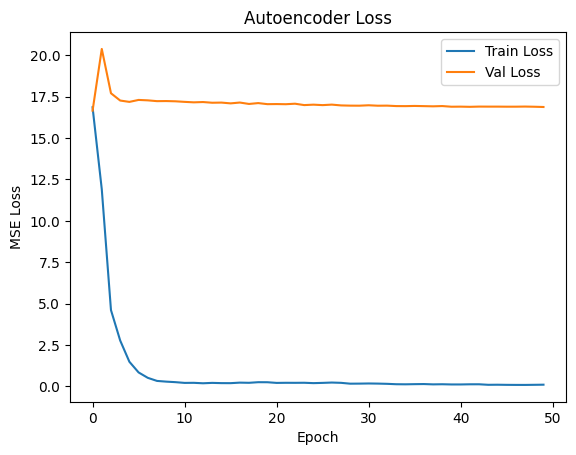

In [199]:
# ## 8. Visualizations
import matplotlib.pyplot as plt
# Plot training loss of autoencoder
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# Comparison

In [200]:
# --- 7. Comparison ---
# Use the calculated RMSE and Precision@10 values
svd_rmse = rmse_svd # RMSE from SVD model evaluation
auto_rmse = rmse # RMSE from Autoencoder (non-zero ratings)
svd_prec = avg_precision # Precision@10 for SVD
auto_prec = avg_precision_ae # Precision@10 for Autoencoder
svd_recall = avg_recall # Recall@10 for SVD
auto_recall = avg_recall_ae # Recall@10 for Autoencoder

In [205]:
print("\n" + "=" * 60)
print("MODEL COMPARISON RESULTS")
print("=" * 60)

print("| Model        | Test RMSE | Precision@10 | Recall@10 |")
print("|--------------|-----------|--------------|-----------|")
print(f"| SVD          | {svd_rmse:.4f}    | {svd_prec:.4f}       | {svd_recall:.4f}      |")
print(f"| Autoencoder  | {auto_rmse:.4f}    | {auto_prec:.4f}       | {auto_recall:.4f}      |")
print(f"| kNN          | {rmse_knn:>8.4f}  | {avg_prec_knn:>14.4f} | {avg_rec_knn:>13.4f} |")


MODEL COMPARISON RESULTS
| Model        | Test RMSE | Precision@10 | Recall@10 |
|--------------|-----------|--------------|-----------|
| SVD          | 0.2593    | 0.9856       | 0.9988      |
| Autoencoder  | 1.8938    | 0.9966       | 0.7715      |
| kNN          |   0.2574  |         0.9856 |        1.0000 |


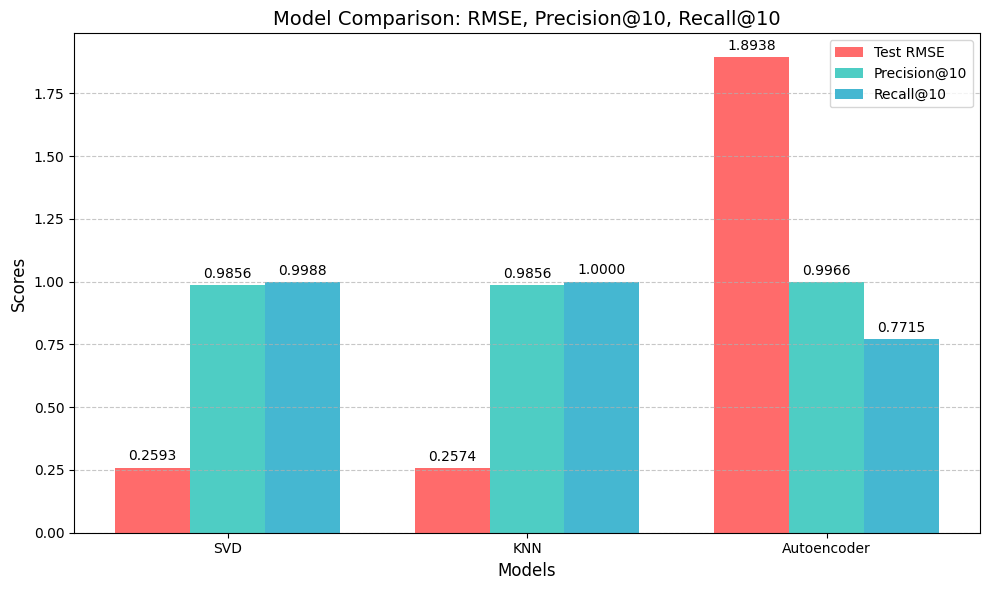

In [212]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example data (replace with your actual values)
data = {
    "Model": ["SVD", "KNN", "Autoencoder"],
    "Test RMSE": [svd_rmse, rmse_knn , auto_rmse],      # Replace with your RMSE values
    "Precision@10": [svd_prec, avg_prec_knn , auto_prec],   # Replace with your Precision@10 values
    "Recall@10": [svd_recall, avg_rec_knn,auto_recall]       # Replace with your Recall@10 values
}

df = pd.DataFrame(data)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = np.arange(len(df))

# Plot each metric
b1 = ax.bar(index, df["Test RMSE"], bar_width, label="Test RMSE", color="#FF6B6B")
b2 = ax.bar(index + bar_width, df["Precision@10"], bar_width, label="Precision@10", color="#4ECDC4")
b3 = ax.bar(index + 2*bar_width, df["Recall@10"], bar_width, label="Recall@10", color="#45B7D1")

# Add labels and title
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title("Model Comparison: RMSE, Precision@10, Recall@10", fontsize=14)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(df["Model"])
ax.legend()

# Add value labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.4f}",
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha="center", va="bottom", fontsize=10)

for b in [b1, b2, b3]:
    add_labels(b)

plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [203]:
# Additional analysis
print(f"\nDetailed Analysis:")
print(f"- RMSE Difference: {abs(svd_rmse - auto_rmse):.4f}")

if svd_prec > 0 and auto_prec > 0:  # Only compare if both values are valid
    print(f"- Precision@10 Difference: {abs(svd_prec - auto_prec):.4f}")
    if svd_prec > auto_prec:
        print(f"- SVD has {((svd_prec - auto_prec) / auto_prec * 100):.1f}% higher Precision@10")
    else:
        print(f"- Autoencoder has {((auto_prec - svd_prec) / svd_prec * 100):.1f}% higher Precision@10")

if svd_recall > 0 and auto_recall > 0:  # Only compare if both values are valid
    print(f"- Recall@10 Difference: {abs(svd_recall - auto_recall):.4f}")
    if svd_recall > auto_recall:
        print(f"- SVD has {((svd_recall - auto_recall) / auto_recall * 100):.1f}% higher Recall@10")
    else:
        print(f"- Autoencoder has {((auto_recall - svd_recall) / svd_recall * 100):.1f}% higher Recall@10")



Detailed Analysis:
- RMSE Difference: 1.6344
- Precision@10 Difference: 0.0110
- Autoencoder has 1.1% higher Precision@10
- Recall@10 Difference: 0.2273
- SVD has 29.5% higher Recall@10


## 8. Key Differences Between Approaches

| Aspect               | SVD Matrix Factorization               | Autoencoder Neural Model                  |
|----------------------|----------------------------------------|-------------------------------------------|
| Modeling style       | Linear latent-factor model             | Nonlinear deep model                      |
| Data representation  | Sparse user–item matrix                | Same matrix, but encoded through layers   |
| Interpretability     | Higher (latent factors interpretable)  | Lower (deep layers are a black box)       |
| Training speed       | Fast (few parameters)                  | Slower (many weights, backpropagation)    |
| Scalability          | Scales well with large sparse data     | May need more compute and memory          |
| Cold-start           | struggle with it                       | Can integrate side features more naturally|
| Typical use case     | Quick baseline with solid RMSE         | Advanced scenarios needing richer signals |
| Sparsity     | Handles sparse data         | Struggles with sparsity |
		


# Thank you